# Dealing with outliers

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def create_ages(seed = 42,loc = 50,sigma = 13,num_samples = 100 ):
    np.random.seed(seed = seed)
    sample = np.round(np.random.normal(loc=loc, scale=sigma, size=num_samples),0)
    return sample

In [3]:
sample = create_ages()

In [4]:
sample

array([56., 48., 58., 70., 47., 47., 71., 60., 44., 57., 44., 44., 53.,
       25., 28., 43., 37., 54., 38., 32., 69., 47., 51., 31., 43., 51.,
       35., 55., 42., 46., 42., 74., 50., 36., 61., 34., 53., 25., 33.,
       53., 60., 52., 48., 46., 31., 41., 44., 64., 54., 27., 54., 45.,
       41., 58., 63., 62., 39., 46., 54., 63., 44., 48., 36., 34., 61.,
       68., 49., 63., 55., 42., 55., 70., 50., 70., 16., 61., 51., 46.,
       51., 24., 47., 55., 69., 43., 39., 43., 62., 54., 43., 57., 51.,
       63., 41., 46., 45., 31., 54., 53., 50., 47.])

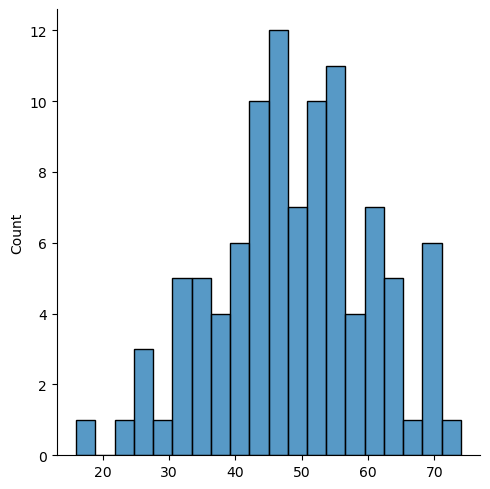

In [5]:
sns.displot(data = sample,bins=20)
plt.show()

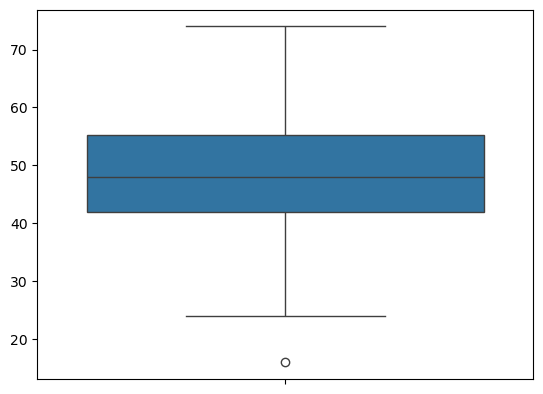

In [6]:
sns.boxplot(sample)
plt.show()

In [7]:
ser = pd.Series(sample)

In [8]:
ser.describe()

count    100.00000
mean      48.66000
std       11.82039
min       16.00000
25%       42.00000
50%       48.00000
75%       55.25000
max       74.00000
dtype: float64

In [9]:
IQR = 55.25-42
lower_limit = 42-1.5*IQR
lower_limit
upper_limit = 55.25+1.5*IQR

In [10]:
ser[(ser>lower_limit) & (ser<upper_limit)]

0     56.0
1     48.0
2     58.0
3     70.0
4     47.0
      ... 
95    31.0
96    54.0
97    53.0
98    50.0
99    47.0
Length: 99, dtype: float64

In [11]:
Q1,Q3 = np.percentile(sample,[25,75])

In [12]:
IQR = Q3-Q1

In [13]:
Q1-1.5*IQR

22.125

In [14]:
df=pd.read_csv("C:\\Users\\User\\Downloads\\UNZIP_FOR_NOTEBOOKS_FINAL (1)\\DATA\\Ames_Housing_Data.csv")

In [15]:
df

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,923275080,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2926,923276100,20,RL,NaN,8885,Pave,NaN,IR1,Low,AllPub,...,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000
2927,923400125,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,132000
2928,924100070,20,RL,77.0,10010,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,170000


In [16]:
df.shape

(2930, 81)

In [17]:
df.corr(numeric_only=True)[['SalePrice']].sort_values('SalePrice')

,SalePrice
PID,-0.246521
Enclosed Porch,-0.128787
Kitchen AbvGr,-0.119814
Overall Cond,-0.101697
MS SubClass,-0.085092
Low Qual Fin SF,-0.037660
Bsmt Half Bath,-0.035835
Yr Sold,-0.030569
Misc Val,-0.015691
BsmtFin SF 2,0.005891


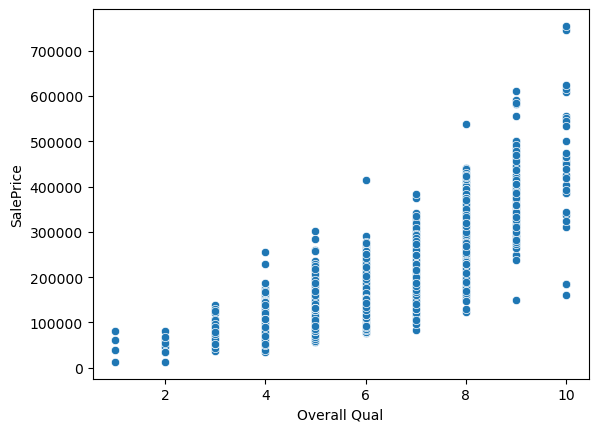

In [18]:
sns.scatterplot(data=df,y='SalePrice',x='Overall Qual')
plt.show()

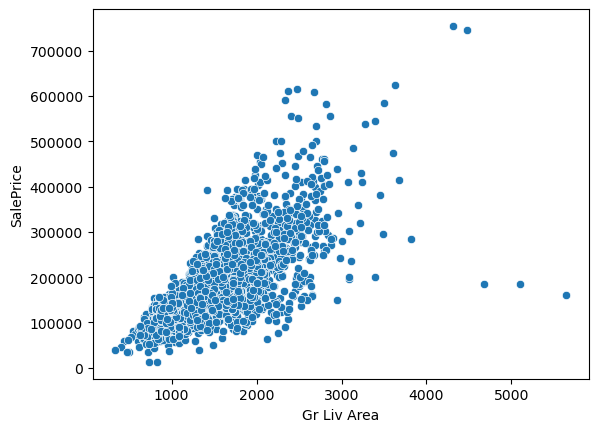

In [19]:
sns.scatterplot(data=df,y='SalePrice',x='Gr Liv Area')
plt.show()

In [20]:
x = df[(df['Overall Qual']>8)  & (df['SalePrice']<200000)]

In [21]:
x

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1182,533350090,60,RL,NaN,24572,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Family,150000
1498,908154235,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
2180,908154195,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,Elev,17000,10,2007,New,Partial,183850
2181,908154205,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750


In [22]:
df = df.drop(index=x.index,axis=0)

In [23]:
df.shape	

(2926, 81)

In [24]:
xx = df[(df['Gr Liv Area']>3000) & (df['SalePrice']<250000)]

In [25]:
df.drop(index = xx.index)

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,923275080,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2926,923276100,20,RL,NaN,8885,Pave,NaN,IR1,Low,AllPub,...,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000
2927,923400125,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,132000
2928,924100070,20,RL,77.0,10010,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,170000


In [26]:
with open("C:\\Users\\User\\Downloads\\UNZIP_FOR_NOTEBOOKS_FINAL (1)\\DATA\\Ames_Housing_Feature_Description.txt",'r') as f:
    print (f.read())

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

In [27]:
df = df.drop(columns ='PID',axis = 1)

In [28]:
df.shape

(2926, 80)

In [29]:
df.isnull().sum()/len(df)

MS SubClass       0.000000
MS Zoning         0.000000
Lot Frontage      0.167122
Lot Area          0.000000
Street            0.000000
                    ...   
Mo Sold           0.000000
Yr Sold           0.000000
Sale Type         0.000000
Sale Condition    0.000000
SalePrice         0.000000
Length: 80, dtype: float64

In [30]:
def percentage_of_nulls(df):
    ser = df.isnull().sum()/len(df)*100
    return ser.sort_values(ascending = False)
x = percentage_of_nulls(df)


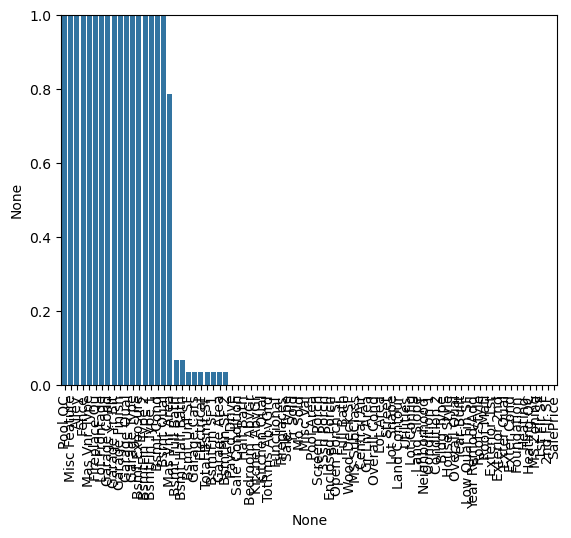

In [35]:
sns.barplot(x=x.index,y=x)
plt.xticks(rotation=90)
plt.ylim(0,1)
plt.show()

In [36]:
x = x[x[:]<1]

In [37]:
x

Mas Vnr Area      0.786056
Bsmt Full Bath    0.068353
Bsmt Half Bath    0.068353
Bsmt Unf SF       0.034176
Garage Cars       0.034176
                    ...   
Heating QC        0.000000
MS Zoning         0.000000
1st Flr SF        0.000000
2nd Flr SF        0.000000
SalePrice         0.000000
Length: 63, dtype: float64

In [39]:
x

Mas Vnr Area      0.786056
Bsmt Full Bath    0.068353
Bsmt Half Bath    0.068353
Bsmt Unf SF       0.034176
Garage Cars       0.034176
                    ...   
Heating QC        0.000000
MS Zoning         0.000000
1st Flr SF        0.000000
2nd Flr SF        0.000000
SalePrice         0.000000
Length: 63, dtype: float64

In [48]:
x = x[x[:]<0.01]

In [53]:
x

Paved Drive        0.0
Sale Condition     0.0
Half Bath          0.0
Bedroom AbvGr      0.0
Kitchen AbvGr      0.0
Kitchen Qual       0.0
TotRms AbvGrd      0.0
Functional         0.0
Fireplaces         0.0
Sale Type          0.0
Yr Sold            0.0
Mo Sold            0.0
Misc Val           0.0
Pool Area          0.0
Screen Porch       0.0
3Ssn Porch         0.0
Enclosed Porch     0.0
Open Porch SF      0.0
Full Bath          0.0
Wood Deck SF       0.0
MS SubClass        0.0
Central Air        0.0
Gr Liv Area        0.0
Overall Cond       0.0
Lot Area           0.0
Street             0.0
Lot Shape          0.0
Land Contour       0.0
Utilities          0.0
Lot Config         0.0
Land Slope         0.0
Neighborhood       0.0
Condition 1        0.0
Condition 2        0.0
Bldg Type          0.0
House Style        0.0
Overall Qual       0.0
Year Built         0.0
Low Qual Fin SF    0.0
Year Remod/Add     0.0
Roof Style         0.0
Roof Matl          0.0
Exterior 1st       0.0
Exterior 2n

In [55]:
df

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,AllPub,CulDSac,...,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2926,20,RL,NaN,8885,Pave,NaN,IR1,Low,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000
2927,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,132000
2928,20,RL,77.0,10010,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,170000


In [56]:
def percent_nan(dataframe):
    percent_nan = dataframe.isnull().sum()/len(dataframe)
    percent_nan = percent_nan[percent_nan>0]
    return percent_nan
percent_nan = percent_nan(df).sort_values(ascending = False)

In [64]:
percent_nan_small = percent_nan[percent_nan<0.01]

In [70]:
percent_nan_small

Mas Vnr Area      0.007861
Bsmt Half Bath    0.000684
Bsmt Full Bath    0.000684
BsmtFin SF 1      0.000342
Garage Cars       0.000342
Garage Area       0.000342
Total Bsmt SF     0.000342
Bsmt Unf SF       0.000342
BsmtFin SF 2      0.000342
Electrical        0.000342
dtype: float64

In [71]:
with open("C:\\Users\\User\\Downloads\\UNZIP_FOR_NOTEBOOKS_FINAL (1)\\DATA\\Ames_Housing_Feature_Description.txt",'r') as f:
    print (f.read())

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

In [72]:
df[df['Garage Cars'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
2236,70,RM,50.0,9060,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,3,2007,WD,Alloca,150909


In [73]:
df[df['Garage Area'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
2236,70,RM,50.0,9060,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,3,2007,WD,Alloca,150909


In [74]:
df[df['Electrical'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1577,80,RL,73.0,9735,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,5,2008,WD,Normal,167500


In [75]:
df.dropna(subset = ['Garage Cars','Garage Area','Electrical'],inplace=True)

In [76]:
percent_nan = percent_nan(df)

TypeError: 'Series' object is not callable

In [ ]:
bsmt_num_cols = ['BsmtFin SF 1','BsmtFin SF 2','Total Bsmt SF','Bsmt Unf SF','Bsmt Full Bath','Bsmt Half Bath']
df[bsmt_num_cols] = df[bsmt_num_cols].fillna(0)
df['BsmtFin SF 1'].isnull().sum()

In [ ]:
bsmt_str_cols = ['Bsmt Exposure','BsmtFin Type 2','Bsmt Cond','Bsmt Qual','BsmtFin Type 1']
df[bsmt_str_cols] = df[bsmt_str_cols].fillna('None')

In [ ]:
df.head()

In [ ]:
percent_nan

In [ ]:
gar_str_columns = ['Garage Finish','Garage Qual','Garage Cond','Garage Type']
df[gar_str_columns]=df[gar_str_columns].fillna('None')

In [ ]:
df['Garage Finish'].value_counts()

In [ ]:
gar_int_columns = ['Garage Finish','Garage Qual','Garage Cond','Garage Type']
df[gar_str_columns]=df[gar_str_columns].fillna('None')

In [ ]:
df['Garage Yr Blt']=df['Garage Yr Blt'].fillna(0)

In [ ]:
percent_nan = percent_of_nan(df)

In [ ]:
def percent_of_nan(dataframe):
    percent_nan = dataframe.isnull().sum()/len(dataframe)
    percent_nan = percent_nan[percent_nan>0]
    return percent_nan

In [ ]:
percent_nan = percent_nan.sort_values()

In [ ]:
df['Mas Vnr Area'] = df['Mas Vnr Area'].fillna(0)

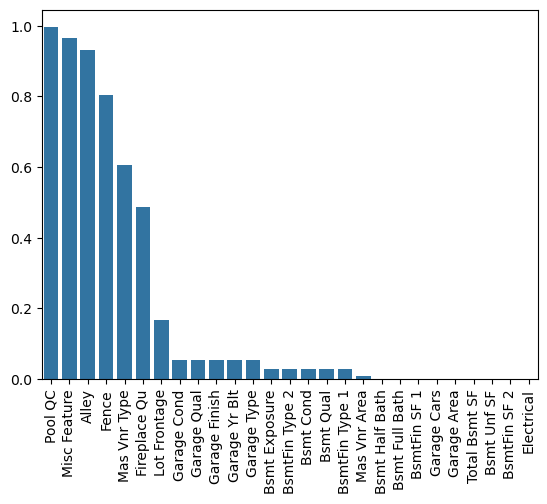

In [80]:
sns.barplot(data = percent_nan)
plt.xticks(rotation = 90)
plt.show()

In [88]:
df.drop(columns = ['Pool QC','Misc Feature','Alley','Fence'],axis = 1,inplace = True)

In [89]:
df.drop(columns = ['Mas Vnr Type'],axis = 1,inplace = True)

In [90]:
df['Fireplace Qu'].value_counts()

Fireplace Qu
Gd    740
TA    600
Fa     75
Po     46
Ex     43
Name: count, dtype: int64

In [92]:
df['Fireplace Qu'] = df['Fireplace Qu'].fillna('None')

In [97]:
df['Lot Frontage']

0       141.0
1        80.0
2        81.0
3        93.0
4        74.0
        ...  
2925     37.0
2926      NaN
2927     62.0
2928     77.0
2929     74.0
Name: Lot Frontage, Length: 2924, dtype: float64

In [99]:
df.columns

Index(['MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area', 'Street',
       'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config', 'Land Slope',
       'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type',
       'House Style', 'Overall Qual', 'Overall Cond', 'Year Built',
       'Year Remod/Add', 'Roof Style', 'Roof Matl', 'Exterior 1st',
       'Exterior 2nd', 'Mas Vnr Area', 'Exter Qual', 'Exter Cond',
       'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2',
       'Bsmt Unf SF', 'Total Bsmt SF', 'Heating', 'Heating QC', 'Central Air',
       'Electrical', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF',
       'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath',
       'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual',
       'TotRms AbvGrd', 'Functional', 'Fireplaces', 'Fireplace Qu',
       'Garage Type', 'Garage Yr Blt', 'Garage Finish', 'Garage Cars',
       'Garage 

In [101]:
df

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,...,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,20,RL,141.0,31770,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,5,2010,WD,Normal,215000
1,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,120,0,0,6,2010,WD,Normal,105000
2,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,12500,6,2010,WD,Normal,172000
3,20,RL,93.0,11160,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,4,2010,WD,Normal,244000
4,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,80,RL,37.0,7937,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,...,0,0,0,0,0,3,2006,WD,Normal,142500
2926,20,RL,NaN,8885,Pave,IR1,Low,AllPub,Inside,Mod,...,0,0,0,0,0,6,2006,WD,Normal,131000
2927,85,RL,62.0,10441,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,700,7,2006,WD,Normal,132000
2928,20,RL,77.0,10010,Pave,Reg,Lvl,AllPub,Inside,Mod,...,0,0,0,0,0,4,2006,WD,Normal,170000


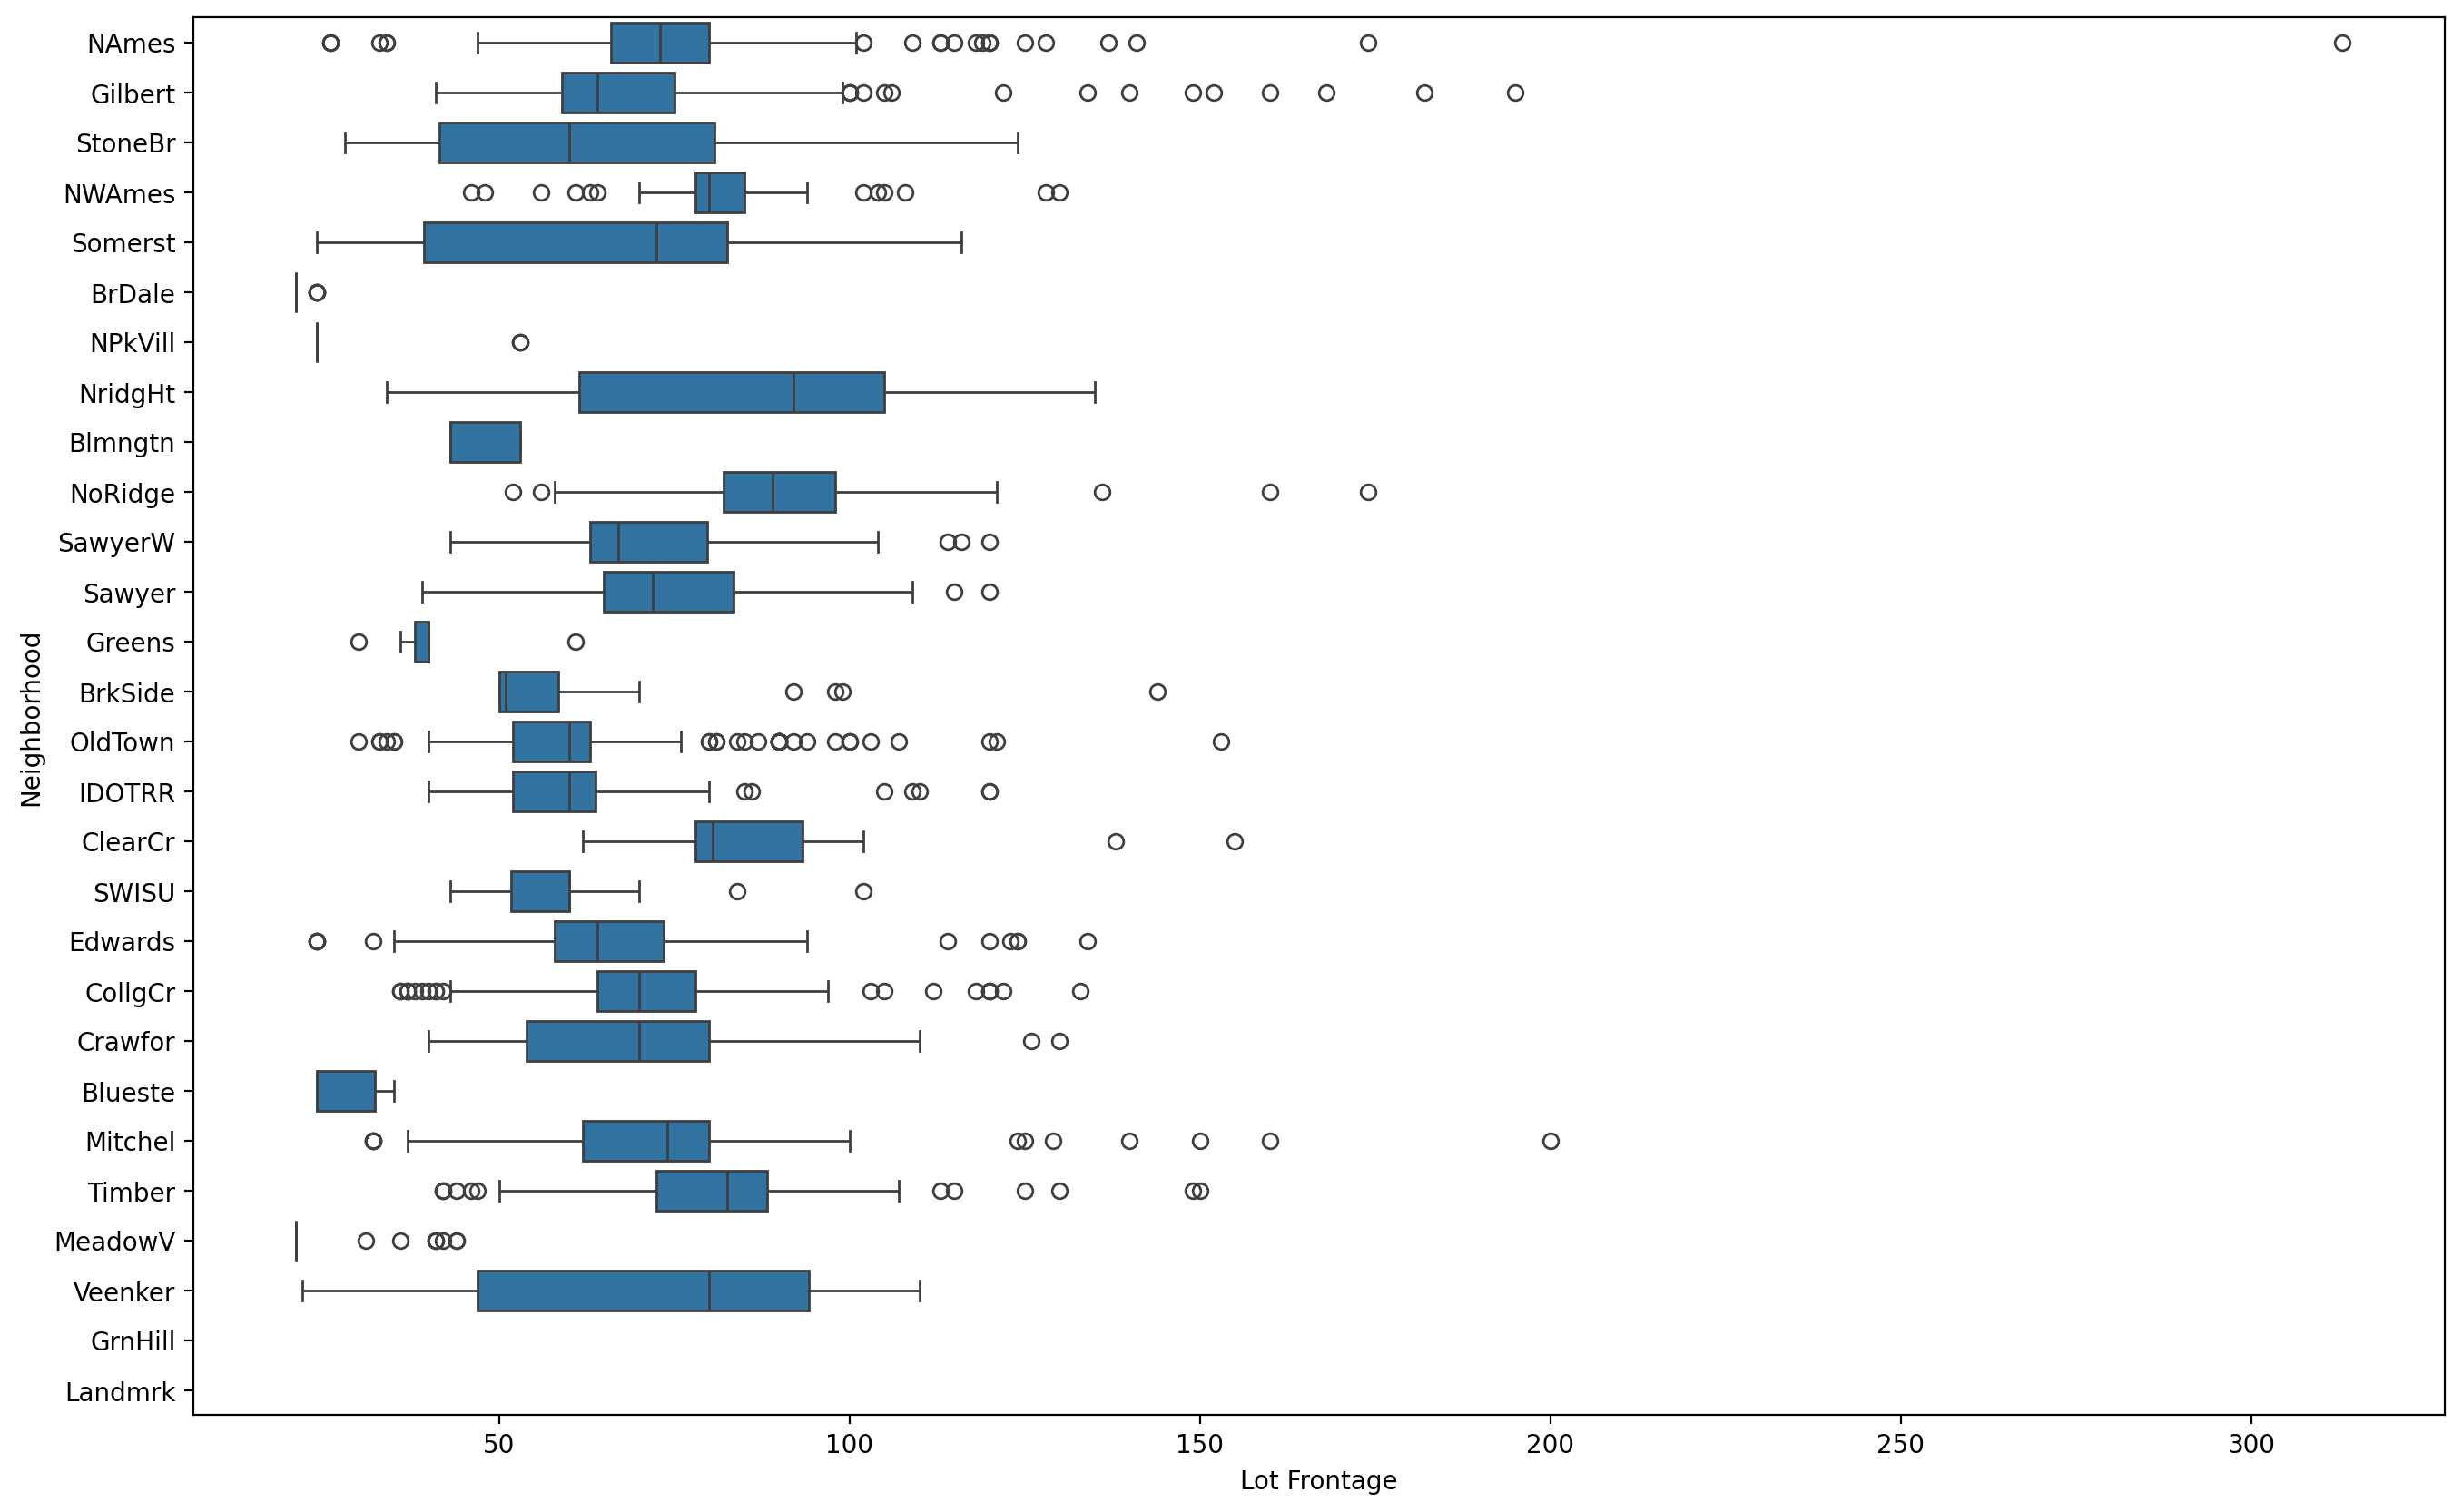

In [103]:
plt.figure(figsize=(16,10),dpi = 200)
sns.boxplot(x='Lot Frontage',y='Neighborhood',data = df)
plt.show()

In [104]:
df['Lot Frontage']=df.groupby('Neighborhood')['Lot Frontage'].transform(lambda value : value.fillna(value.mean()))

In [105]:
df.isnull().sum()

MS SubClass       0
MS Zoning         0
Lot Frontage      3
Lot Area          0
Street            0
                 ..
Mo Sold           0
Yr Sold           0
Sale Type         0
Sale Condition    0
SalePrice         0
Length: 75, dtype: int64

In [106]:
df['Lot Frontage'] = df['Lot Frontage'].fillna(0)

In [107]:
df = pd.read_csv("C:\\Users\\User\\Downloads\\UNZIP_FOR_NOTEBOOKS_FINAL (1)\\DATA\\Ames_NO_Missing_Data.csv")

In [110]:
df['MS SubClass'] = df['MS SubClass'].apply(str)

In [114]:
df['MS SubClass']

0       20
1       20
2       20
3       20
4       60
        ..
2920    80
2921    20
2922    85
2923    20
2924    60
Name: MS SubClass, Length: 2925, dtype: object

In [117]:
direction = pd.Series(['Up','Up','Down'])

In [119]:
pd.get_dummies(drop_first=True,data = direction,dtype = int)

,Up
0,1
1,1
2,0


In [125]:
direction

0      Up
1      Up
2    Down
dtype: object

In [133]:
pd.get_dummies(data = direction, drop_first=True,dtype = int)

,Up
0,1
1,1
2,0


In [143]:
df_object = df.select_dtypes(include='object')

In [137]:
df_numerical = df.select_dtypes(exclude = 'object')

In [139]:
df_numerical

,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
0,141.000000,31770,6,5,1960,1960,112.0,639.0,0.0,441.0,...,210,62,0,0,0,0,0,5,2010,215000
1,80.000000,11622,5,6,1961,1961,0.0,468.0,144.0,270.0,...,140,0,0,0,120,0,0,6,2010,105000
2,81.000000,14267,6,6,1958,1958,108.0,923.0,0.0,406.0,...,393,36,0,0,0,0,12500,6,2010,172000
3,93.000000,11160,7,5,1968,1968,0.0,1065.0,0.0,1045.0,...,0,0,0,0,0,0,0,4,2010,244000
4,74.000000,13830,5,5,1997,1998,0.0,791.0,0.0,137.0,...,212,34,0,0,0,0,0,3,2010,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2920,37.000000,7937,6,6,1984,1984,0.0,819.0,0.0,184.0,...,120,0,0,0,0,0,0,3,2006,142500
2921,75.144444,8885,5,5,1983,1983,0.0,301.0,324.0,239.0,...,164,0,0,0,0,0,0,6,2006,131000
2922,62.000000,10441,5,5,1992,1992,0.0,337.0,0.0,575.0,...,80,32,0,0,0,0,700,7,2006,132000
2923,77.000000,10010,5,5,1974,1975,0.0,1071.0,123.0,195.0,...,240,38,0,0,0,0,0,4,2006,170000


In [147]:
df_object = pd.get_dummies(data = df_object ,drop_first=True, dtype= int)

In [149]:
final_df = pd.concat(axis = 1, objs = [df_object, df_numerical])

In [151]:
final_df

,MS SubClass_150,MS SubClass_160,MS SubClass_180,MS SubClass_190,MS SubClass_20,MS SubClass_30,MS SubClass_40,MS SubClass_45,MS SubClass_50,MS SubClass_60,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
0,0,0,0,0,1,0,0,0,0,0,...,210,62,0,0,0,0,0,5,2010,215000
1,0,0,0,0,1,0,0,0,0,0,...,140,0,0,0,120,0,0,6,2010,105000
2,0,0,0,0,1,0,0,0,0,0,...,393,36,0,0,0,0,12500,6,2010,172000
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,4,2010,244000
4,0,0,0,0,0,0,0,0,0,1,...,212,34,0,0,0,0,0,3,2010,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2920,0,0,0,0,0,0,0,0,0,0,...,120,0,0,0,0,0,0,3,2006,142500
2921,0,0,0,0,1,0,0,0,0,0,...,164,0,0,0,0,0,0,6,2006,131000
2922,0,0,0,0,0,0,0,0,0,0,...,80,32,0,0,0,0,700,7,2006,132000
2923,0,0,0,0,1,0,0,0,0,0,...,240,38,0,0,0,0,0,4,2006,170000
